# Data Analytics Final Project: 
*"Comparing Researchers teaching performance with faculty members dedicated completely to teaching"*

- Luis Ángel Sedas Díaz
- Mario Chávez

Tecnológico de Monterrey, Monterrey, NL, México

On this notebook, we perform the data analysis on our database in order to find insights. We start by asking the following questions:

1. What is the relation between research and teaching?
2. What characteristics do researchers, who are qualified as good/bad, have in common?
2. What characteristics do professors, who are qualified as good/bad, have in common?

Data Base with 15781 registers

Tasks:
- Create a classification variable (good or bad) for each professor, and so we need to generate a criteria of what is a good/bad score. We can start by partition around the median (50%).
- Find which variables affect the most the score in ECOA (feature selection).
- Apply clustering to find similarities between individuals.

In [3]:
%run .\DA-cleaning.ipynb

In [4]:
%run .\functions.ipynb

# Data Analysis

In [5]:
table_count_campus = data[['Campus','ID']].groupby(['Campus'],as_index=False).count().sort_values(by=['ID'],ascending=False)
table_count_campus['percentage'] = table_count_campus['ID']/len(data)*100
table_count_campus[0:5]

,Campus,ID,percentage
13,Campus Monterrey,4311,27.317660
5,Campus Ciudad de México,1545,9.790254
8,Campus Guadalajara,1528,9.682530
7,Campus Estado de México,1295,8.206071
17,Campus Querétaro,1068,6.767632


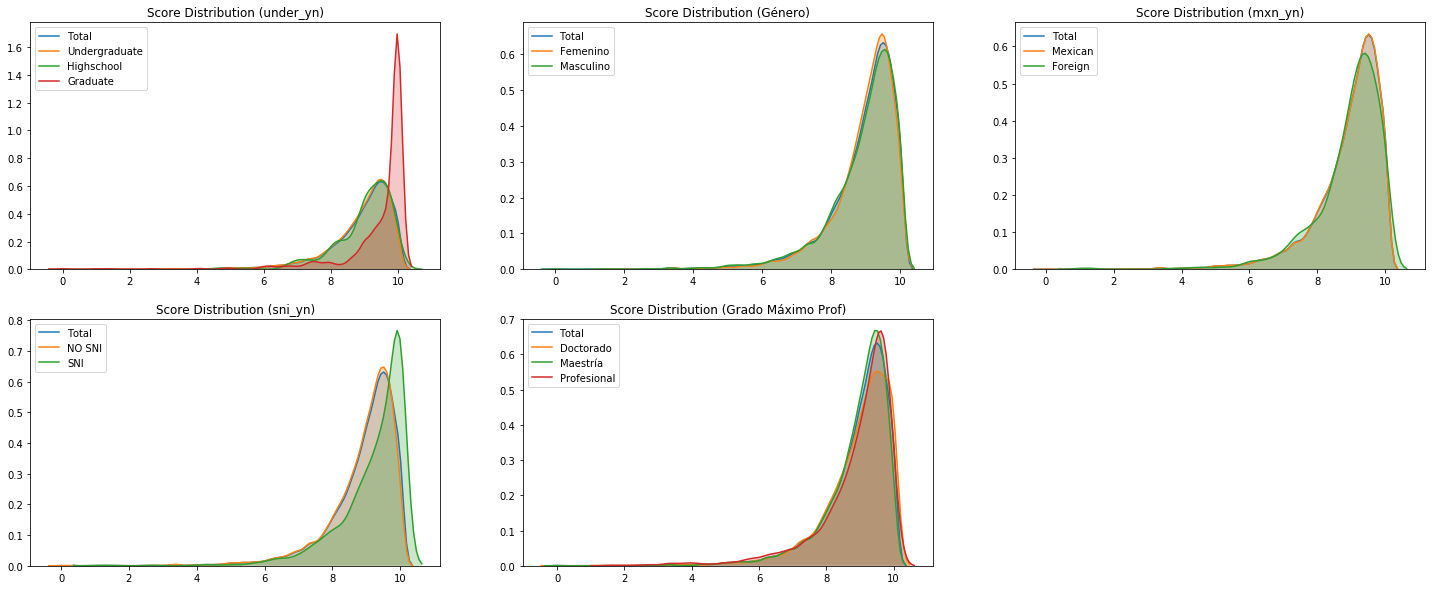

In [7]:
plt.figure(figsize=(25,10))       # set dimensions of the figure
plt.subplot(2,3, 1);     distribution_plot(data,'under_yn')
plt.subplot(2,3, 2);     distribution_plot(data,'Género')
plt.subplot(2,3, 3);     distribution_plot(data,'mxn_yn')
plt.subplot(2,3, 4);     distribution_plot(data,'sni_yn')
plt.subplot(2,3, 5);     distribution_plot(data,'Grado Máximo Prof')
plt.show()

We can see that Graduate students give better scores to their professors.

Because the 94% of the data is from undergraduate courses, this is distribution is basically the same as the one from the complete data. This also happens In the distribution of "NO SNI" which are the no reseachers, because this represents the 90% of the individuals.

With these distribution plots we can see that the significant variables are:
- **under_yn**
- **sni_yn**

## Undergraduate

In [74]:
df_under = data[data.under_yn == 'Undergraduate']

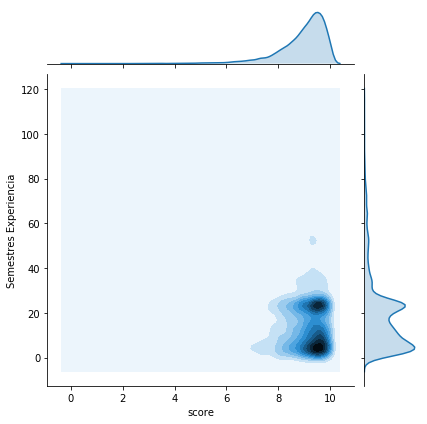

In [69]:
sns.jointplot(x="score", y="experience", data=df_under, kind="kde");
plt.show()

## Graduate

In [75]:
df_grad = data[data.under_yn == 'Graduate']

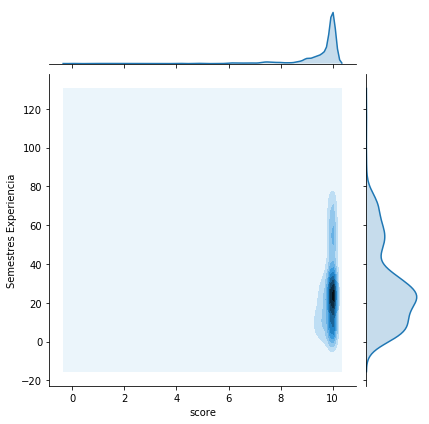

In [70]:
sns.jointplot(x="score", y="experience", data=df_grad, kind="kde");
plt.show()

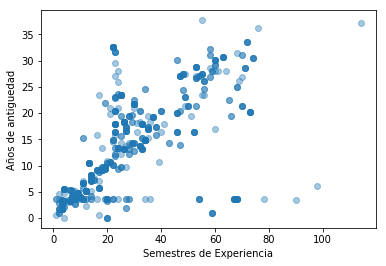

In [97]:
temp_scatter = df_grad[['experience','Años de Antigüedad']].dropna()
x_norm = temp_scatter.experience
y_norm = temp_scatter['Años de Antigüedad']

plt.scatter(x_norm, y_norm, alpha=0.4)
plt.xlabel('Semestres de Experiencia')
plt.ylabel('Años de antiguedad')

plt.show()

In [95]:
#

# Extra

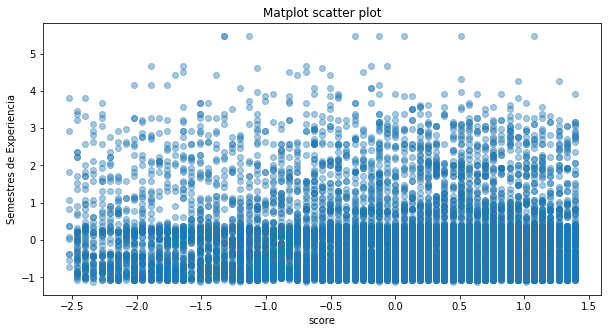

In [12]:
temp = removes_outliers(.1,.9,data,'score')
# Create plot
fig, ax = plt.subplots(figsize=(10,5))

x_norm = temp['score'];
x_norm = (x_norm-np.mean(x_norm))/np.std(x_norm)

y_norm = temp['Semestres Experiencia'];
y_norm = (y_norm-np.mean(y_norm))/np.std(y_norm)

ax.scatter(x_norm, y_norm, alpha=0.4)
plt.xlabel('score')
plt.ylabel('Semestres de Experiencia')
plt.title('Matplot scatter plot')

plt.show()

<Figure size 432x288 with 0 Axes>

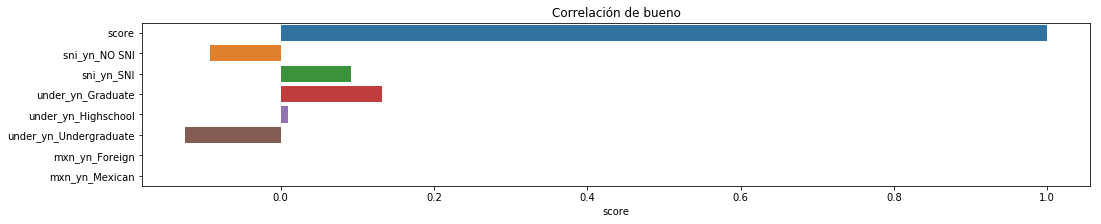

In [14]:
# Barplot de correlaciones de variables económicas contra la cantidad de cajeros a 300m
cor_temp = pd.get_dummies(data[['sni_yn','under_yn','mxn_yn','score']]).corr()
title = 'Correlación de bueno'

y_index = cor_temp.index
values_cor = cor_temp['score']

correlations_barplot(y_index,values_cor,title)

In [2]:
#